# **Project Name**    - 



##### **Project Type**    - Bike Sharing Demand Prediction (Regression)
##### **Contribution**    - Individual (Mohd Arham Islam)


# **Project Summary -**

This project utilizes a dataset of rental bike usage, which includes information on the number of bikes rented at each hour, the location of the rental station, and the weather conditions at the time of rental. The aim of this project is to use regression analysis to predict the required bike count at each hour, enabling rental bike providers to maintain a stable supply of bikes and enhance mobility comfort for users.

To achieve this goal, the project will involve several steps. First, we will preprocess the dataset to ensure that it is clean and organized for analysis. This will involve handling missing data, removing outliers, and encoding categorical variables.

Next, we will explore the dataset using statistical analysis and visualization techniques to identify trends and patterns in bike rental demand. This will help us to identify the key variables that affect bike rental demand, such as the time of day, day of the week, weather conditions, and location of the rental station.

After identifying the relevant variables, we will use regression analysis to develop a predictive model that can accurately predict the number of bikes required at each hour. We will use linear regression to build and evaluate different models.

Overall, this project aims to provide a solution for the challenge of maintaining a stable supply of rental bikes in urban cities. By utilizing regression analysis and machine learning techniques, we can develop a predictive model that enables rental bike providers to maintain a reliable supply of bikes, reducing waiting times and enhancing mobility comfort for users.

# **GitHub Link -**

[GitHub link](https://github.com/mohd-arham-islam/Bike-Share)

# **Problem Statement**


To develop a predictive model using regression analysis that accurately predicts the required bike count at each hour. This will enable rental bike providers to maintain a stable supply of bikes, reducing waiting times for users and enhancing their overall mobility comfort.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Project/SeoulBikeData.csv'
df = pd.read_csv(path,encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
num_duplicates = df.duplicated().sum()
num_duplicates

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
num_missing = df.isnull().sum()
num_missing

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

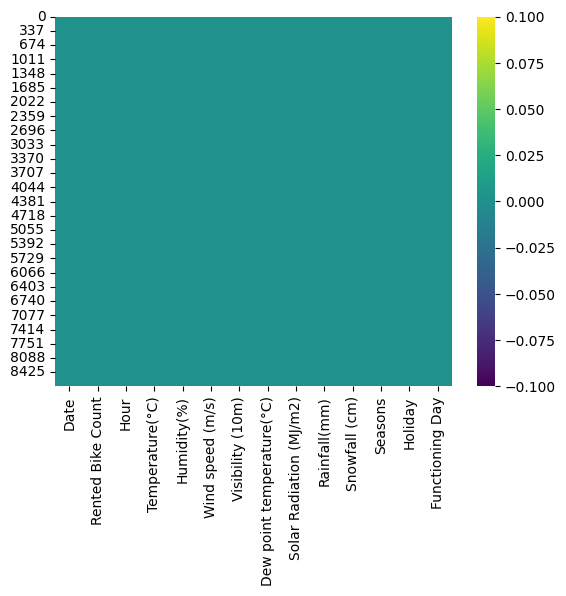

In [9]:
# Visualizing the missing values
# Creating heatmap to visualize the missing values
sns.heatmap(df.isnull(), cmap='viridis')

# Showing the plot
plt.show()

### What did you know about your dataset?

We know that the dataset has the following characteristics:

**No duplicate values**: This means that each observation in the dataset is unique and there are no repeated values.

**No missing values**: This means that there are no null or NaN values in the dataset, and all the required data for each observation is present.

These characteristics suggest that the dataset is in a clean and tidy format, with all the required data for analysis present and no need for additional data cleaning or imputation. However, there may still be other issues with the dataset, such as outliers, inconsistencies, or data entry errors, that may need to be addressed during the data analysis process.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

The dataset contains the following variables:

**Date**: The date of the observation

**Hour**: The hour of the observation

**Temperature**: The temperature at the time of the observation

**Hour of the day**: The hour of the day on a scale of 0 to 23

**Humidity**: The humidity at the time of the observation in %

**Windspeed**: The windspeed at the time of the observation in m/s

**Visibility**: The visibility at the time of the observation in 10m

**Dew Point Temperature**: The dew point temperature at the time of the observation in °C

**Solar Radiation**: The solar radiation at the time of the observation in MJ/m2

**Rainfall**: The amount of rainfall at the time of the observation, measured in mm

**Snowfall**: The amount of snowfall at the time of the observation, measured in mm

**Seasons**: The season at the time of the observation, with values of 1 (spring), 2 (summer), 3 (fall), or 4 (winter)

**Holiday**: A binary variable indicating whether the observation occurred on a holiday or not

**Functional Day**: A binary variable indicating whether the observation was a functional day or not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Checking for missing values in each column
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no missing values in any of the column.

In [14]:
# Checking for duplicate Values
duplicates =len(df[df.duplicated()])
print(duplicates)

0


There are no duplicate values in our dataset

In [15]:
# Converting the 'date' column into 3 separate ones - 'Day', 'Month', and 'Year'
import datetime as dt
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,date,year,month,day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,Friday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,Friday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,Friday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,Friday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,Friday


### What all manipulations have you done and insights you found?

The dataset is clean and does not contain any missing and null values. For our conveninience we have just separated the date column into 3 separate ones - 'Day', 'Month', and 'Year'. The manipulation performed of separating the date column into day, month, and year is likely to be helpful for analyzing temporal patterns in bike usage. Some potential insights that could be derived from this dataset may include seasonal trends, weekly patterns, popular routes, and areas of high demand.

By examining the number of bike rentals over each month or quarter, it may be possible to identify seasonal trends in bike usage, such as whether usage is higher during certain months or seasons. Similarly, by analyzing usage patterns by day of the week, it may be possible to identify trends in bike usage over the course of the week, such as whether usage is higher on weekdays or weekends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [16]:
# Chart - 1: Count of Rented bikes acording to Month

# Pivot Table showing the variation of count of rented bikes monthwise
bike_month = pd.pivot_table(df,values='Rented Bike Count', index='month', aggfunc='sum')
bike_month

,Rented Bike Count
month,
1,150006
2,151833
3,380594
4,524227
5,707088
6,896887
7,734460
8,651887
9,673612


[Text(0, 200000, '200K'),
 Text(0, 400000, '400K'),
 Text(0, 600000, '600K'),
 Text(0, 800000, '800K')]

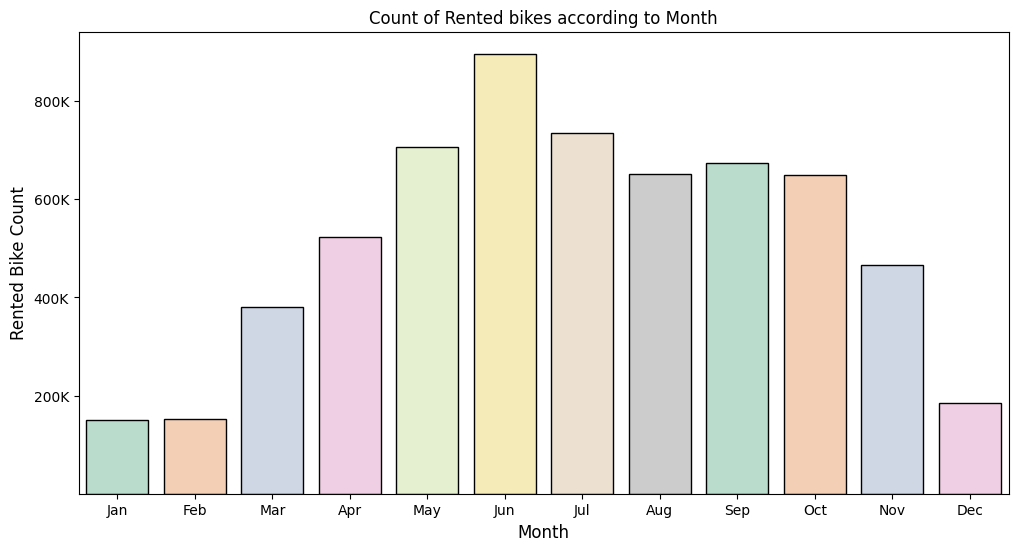

In [17]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(12, 6))

#Changing the colors of the bars
color = sns.color_palette('Pastel2')

sns.barplot(data=bike_month, x=list(bike_month.index), y='Rented Bike Count', palette=color, edgecolor='black', errorbar=None)
ax.set(title='Count of Rented bikes according to Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Setting the axes titles
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Rented Bike Count', fontsize=12)

# Changing y-tick labels
ytick_labels = ['200K', '400K', '600K', '800K']
ytick_values = [200000, 400000, 600000, 800000]
ax.set_yticks(ytick_values)
ax.set_yticklabels(ytick_labels)

##### 1. Why did you pick the specific chart?

I chose a bar chart to show the variation of rented bike count monthwise because it is an effective way to visualize categorical data. In my analysis of the Bike Sharing dataset, I found that the number of rented bikes is lowest during winters (December to February) and highest in June. The bar chart allowed me to easily compare the rented bike count across different months and identify this seasonal pattern. By using this chart, I was able to present the data in a clear and concise manner, making it easy for others to understand the insights I had found.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the bar chart showing the variation of rented bike count monthwise is that the number of rented bikes is lowest during winters (December to February) and highest in June. This indicates a seasonal pattern in the bike rental business, with demand for rented bikes being lower in the colder months and higher in the summer months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the chart, which shows a seasonal pattern in the demand for rented bikes, can potentially help create a positive business impact. By adjusting the number of bikes available for rent or offering promotions during the winter months, bike rental companies can try to maintain a steady demand throughout the year and increase revenue. Similarly, city planners or transportation authorities can use this insight to better plan bike infrastructure and public transportation schedules, which can lead to a more efficient and sustainable transportation system.

However, there is a potential negative impact that could arise from this insight. If bike rental companies fail to adjust their inventory or promotions to meet seasonal demand, they may experience a decrease in revenue during the winter months. Similarly, if city planners or transportation authorities do not take into account seasonal usage patterns, they may end up investing in bike infrastructure or public transportation systems that are not being utilized during certain parts of the year.

#### Chart - 2

In [18]:
# Chart - 2: Variation of rented bikes day wise.

# Pivoting the dataframe
bike_day = pd.pivot_table(df, values='Rented Bike Count', index='day', aggfunc='sum')
bike_day

,Rented Bike Count
day,
Friday,950334
Monday,911743
Saturday,885492
Sunday,780194
Thursday,861999
Tuesday,858596
Wednesday,923956


In [19]:
# Defining the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordering the index labels
bike_day = bike_day.reindex(weekday_order)
bike_day

,Rented Bike Count
day,
Monday,911743
Tuesday,858596
Wednesday,923956
Thursday,861999
Friday,950334
Saturday,885492
Sunday,780194


[Text(0, 200000, '200K'),
 Text(0, 400000, '400K'),
 Text(0, 600000, '600K'),
 Text(0, 800000, '800K')]

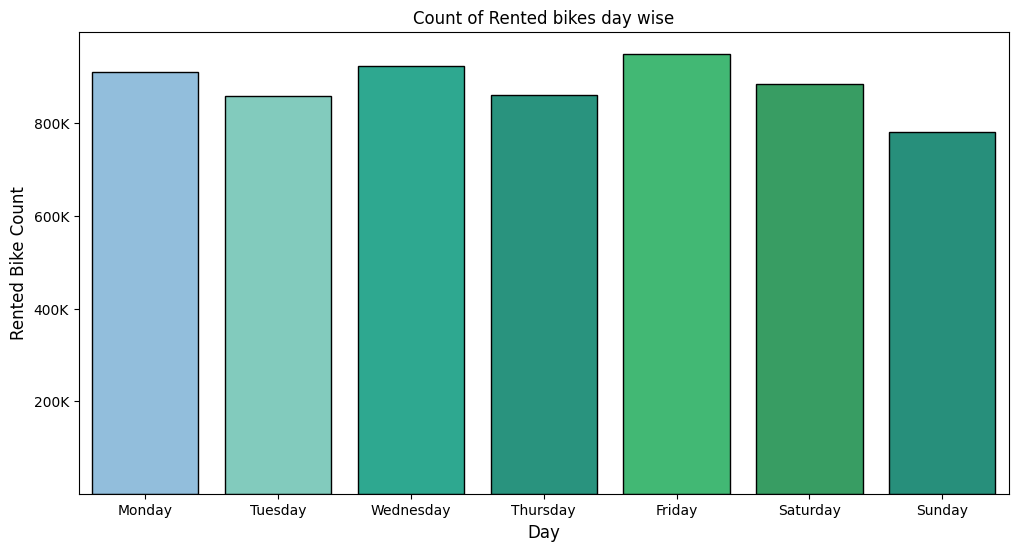

In [20]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(12, 6))

# Changing the colors of the bars
colors = ['#85c1e9', '#76d7c4','#1abc9c', '#17a589','#2ecc71', '#27ae60', '#16a085']

sns.barplot(data=bike_day, x=list(bike_day.index), y='Rented Bike Count',palette=colors, edgecolor='black', errorbar=None)
ax.set(title='Count of Rented bikes day wise')

# Setting the axes titles
ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Rented Bike Count', fontsize=12)

# Changing y-tick labels
ytick_labels = ['200K', '400K', '600K', '800K']
ytick_values = [200000, 400000, 600000, 800000]
ax.set_yticks(ytick_values)
ax.set_yticklabels(ytick_labels)

##### 1. Why did you pick the specific chart?

I chose a bar chart to show the variation of the number of rented bikes day-wise for the Bikesharing dataset because it is an effective way to compare the values of different categories, such as the number of rented bikes for each day of the week. Bar charts are also a commonly used type of chart and are familiar to many people, which can make it easier for my audience to understand and interpret the data. Additionally, bar charts can be easily labeled to clearly indicate the categories being compared and the values being represented, which helps to ensure that my audience can easily read and understand the chart.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart of the variation of the number of rented bikes day-wise for the Bikesharing dataset are that the number of rented bikes is consistent from Monday to Friday and slightly lower on the weekends. This suggests a potential relationship between the availability of bikes and the demand for them on weekdays versus weekends. Additionally, the fact that there is not much difference between the most and least number of rented bikes throughout the week indicates that the demand for rented bikes is relatively stable. This information could be useful for planning purposes, as it suggests that bike rental companies may not need to adjust their offerings significantly from day to day. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information about the consistent demand for rented bikes on weekdays versus weekends, and the stable demand throughout the week, could help bike rental companies to plan their resources and marketing efforts more effectively, potentially leading to increased customer satisfaction and revenue.

However, there are also some potential negative impacts that could arise from these insights. For example, the fact that there is less demand for rented bikes on weekends may lead to lower revenue for bike rental companies on those days, which could have a negative impact on their business. Additionally, if bike rental companies are not able to effectively plan their resources to meet the stable demand for rented bikes throughout the week, this could result in inefficient use of their resources and increased costs, which could also have a negative impact on their business.

#### Chart - 3

In [21]:
# Chart 3: Hourly Fluctuations in Bike Rentals

# Pivoting the dataframe
bike_hour = pd.pivot_table(df, values='Rented Bike Count', index='Hour', aggfunc='sum')
bike_hour.head()

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396


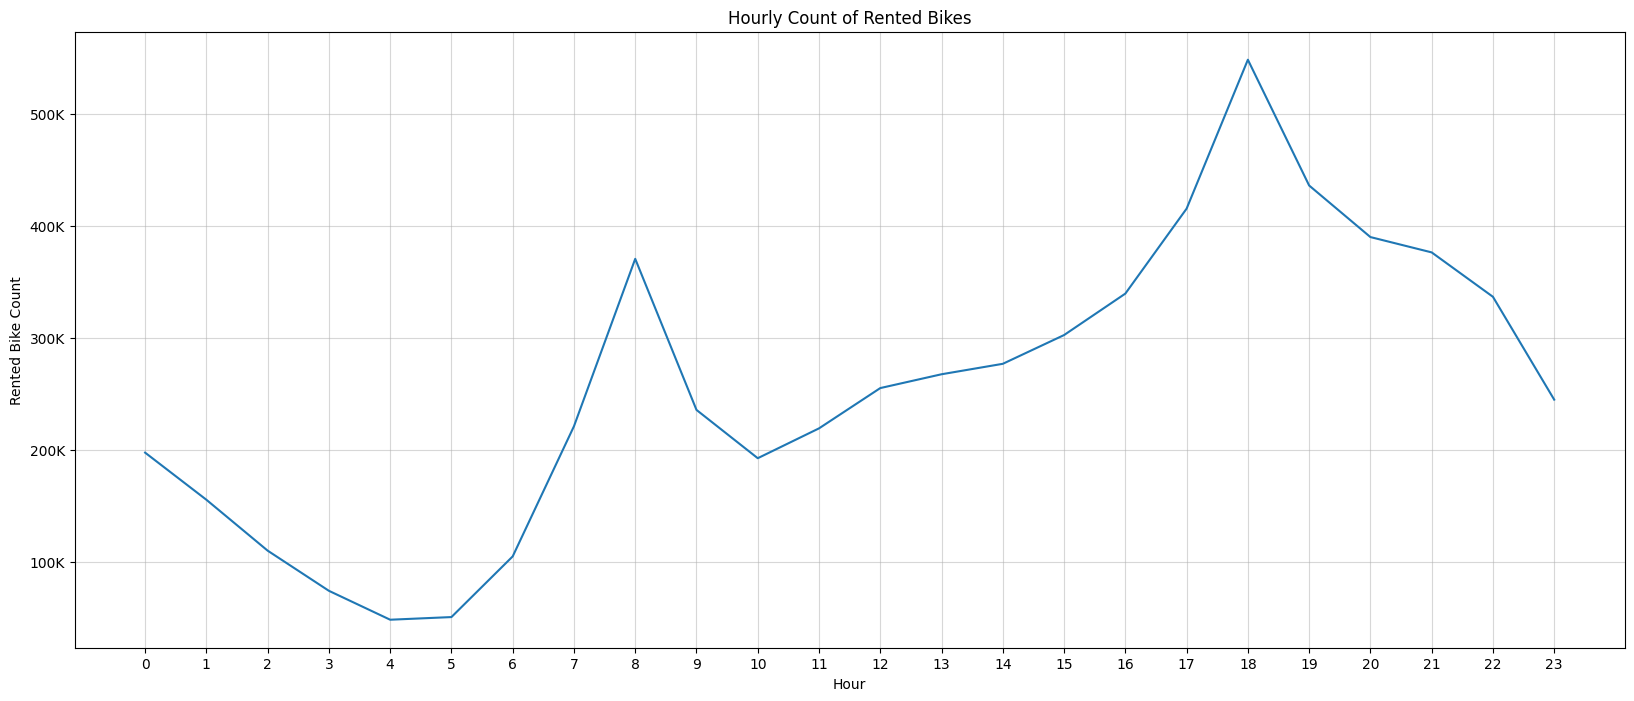

In [22]:
# Visualizing the table

bike_hour.plot(figsize=(20, 8), legend=None)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hourly Count of Rented Bikes')
plt.yticks([100000, 200000, 300000, 400000, 500000], ['100K', '200K', '300K', '400K', '500K'])
plt.grid(alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I picked the line plot to show the variation of hourly fluctuations of total rented bikes because it allows me to visualize how the total count of rented bikes changes over time in a continuous manner. The line plot connects the data points for each hour, which helps me see the trend and patterns in the data more easily. Additionally, the line plot is a good choice for showing the changes in a variable over time because it is simple and easy to read, and it is a familiar chart type that most people are comfortable with.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that there are two peaks in the hourly count of rented bikes, one at 8 am and one at 6 pm, which may be due to office goers. The minimum count of rented bikes occurs at 4 am, while the maximum count occurs at 6 pm. These insights suggest that there are specific times of the day when the demand for rented bikes is higher, and that this demand is likely driven by people's work schedules.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can potentially help create a positive business impact. By understanding the hourly fluctuations in the count of rented bikes, businesses can make informed decisions about managing their inventory, staffing levels, and marketing efforts to maximize revenue and improve customer satisfaction. For example, if there is a high demand for rented bikes during peak hours, businesses can increase the number of bikes available during those times to ensure that customers have access to bikes when they need them. Alternatively, if there is a low demand for rented bikes during off-peak hours, businesses can consider offering promotions or discounts to incentivize customers to rent bikes during those times.

As for negative growth, it is unlikely that the insights gained from the chart would lead to negative growth on their own. However, there could be potential negative impacts if businesses do not act on these insights or make poor decisions based on them. For example, if a business does not adjust the number of bikes available during peak hours, they may experience a decrease in customer satisfaction as customers may not be able to rent a bike when they need it. 

#### Chart - 4

In [23]:
# Chart - 4: Pie Chart showing number of bikes rented during Summer and Winter

# Pivoting the dataframe
bike_season = pd.pivot_table(df, values='Rented Bike Count', index='Seasons', aggfunc='sum')
bike_season.head()

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


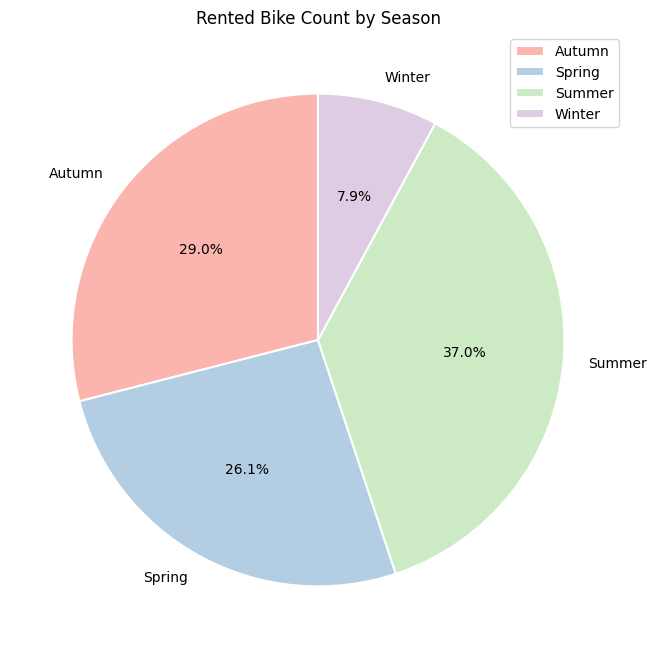

In [24]:
# Creating a list of colors for the pie chart
colors = sns.color_palette('Pastel1')

# Creating a pie chart
bike_season.plot(kind='pie', y='Rented Bike Count', labels=bike_season.index, colors=colors, autopct='%1.1f%%', wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, startangle=90, figsize=(20,8))

# Adding a title to the pie chart
plt.title('Rented Bike Count by Season')

# Removing the y-label
plt.ylabel('')

# Displaying the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose to visualize the data on rented bikes by season using a pie chart because it effectively shows the distribution of rented bikes across the four seasons in a visually appealing way. The use of colors and percentages in a circular format make it easy to compare the relative sizes of each season and see which one has the highest and lowest counts. Additionally, pie charts are commonly used to show proportions and percentages, which makes it a suitable chart for the type of data we have. 

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, we can see that summer has the highest percentage of rented bikes, accounting for over 37% of the total count. Autumn is the second highest with 29%, followed by spring with 26%. Winter has the lowest percentage of rented bikes, accounting for only 7.9% of the total count. This suggests that the demand for rented bikes is highest during the summer season, which could be due to various reasons such as pleasant weather and summer vacations. Conversely, the low demand for rented bikes during the winter season could be attributed to colder temperatures and less favorable weather conditions. Overall, the chart gives us a quick and easy way to compare the percentage of rented bikes across the four seasons and draw insights from the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could help create a positive business impact as it allows the bike rental company to plan their inventory and marketing strategies according to the seasonal trends. For instance, since summer has the highest demand for rented bikes, the company could stock up on bikes and have more marketing campaigns during this season to increase their revenue. They could also offer special discounts or promotions during the off-seasons to attract more customers and boost their business.

As for insights that could lead to negative growth, the low demand for rented bikes during the winter season could be a concern. However, this could also present an opportunity for the company to come up with innovative ideas to attract more customers during the winter months. For example, they could introduce electric bikes that are more suitable for colder temperatures, or offer winter sports equipment rental to appeal to a different segment of customers.

#### Chart - 5

In [25]:
# Chart 5:  Histogram depicting the distribution of bikes rented as per the varying temperatures

bike_temp = pd.pivot_table(df, values='Rented Bike Count', index='Temperature(°C)', aggfunc='sum')
bike_temp

,Rented Bike Count
Temperature(°C),
-17.8,322
-17.5,291
-17.4,64
-16.9,36
-16.5,96
...,...
38.0,1184
38.7,475
39.0,1033


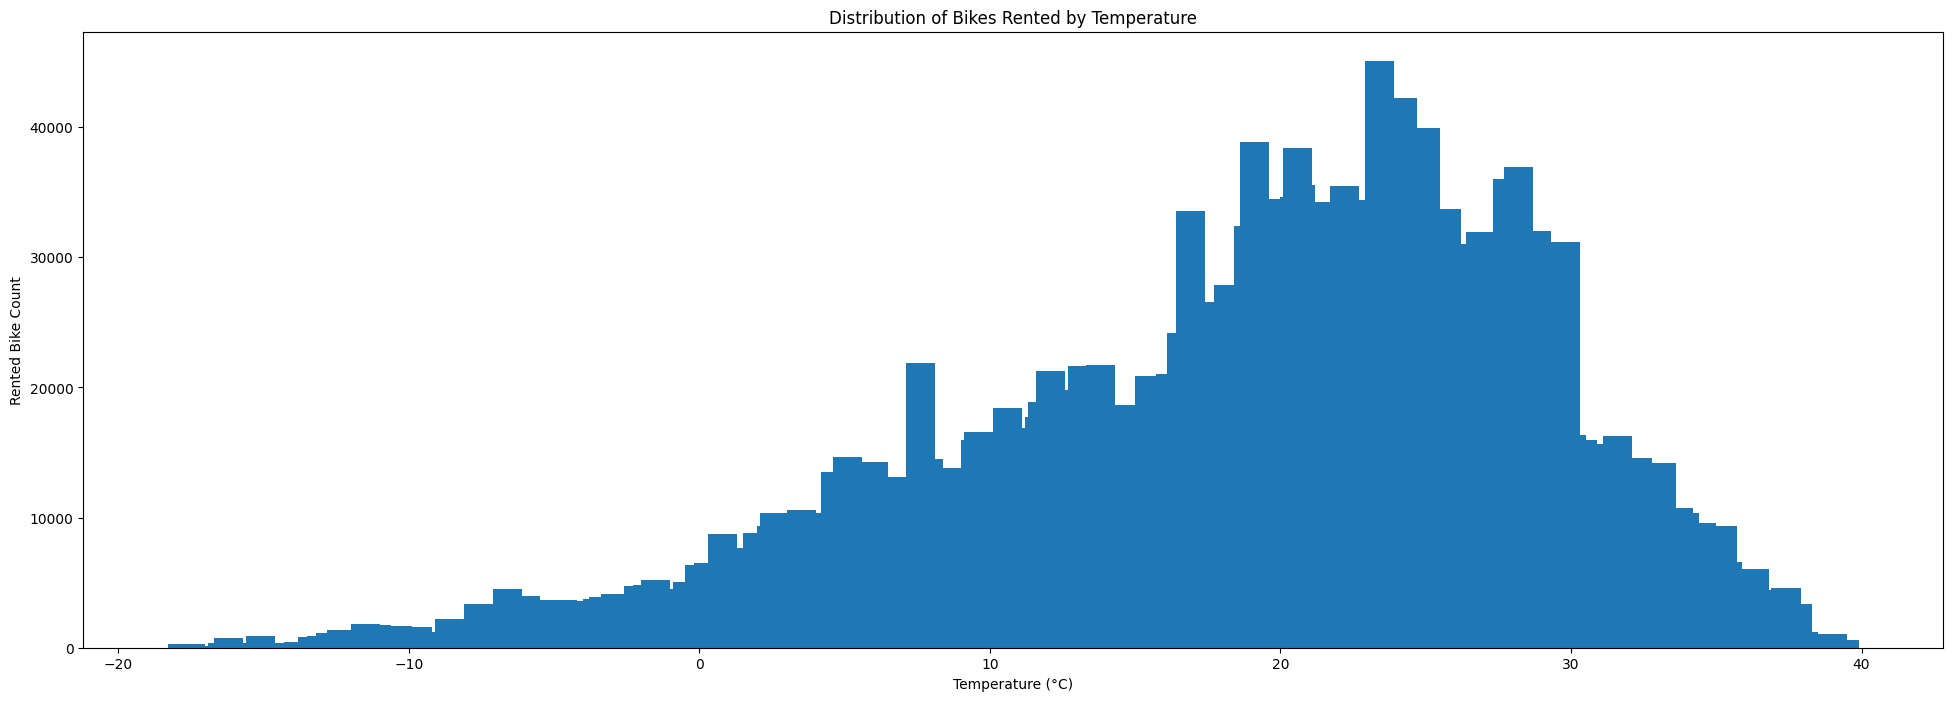

In [26]:
# Creating a histogram to visualize above table

# Setting figure size
plt.figure(figsize=(24,8))
plt.bar(bike_temp.index, bike_temp['Rented Bike Count'], width=1)

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Distribution of Bikes Rented by Temperature')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram with bars representing the frequency of rented bikes at different temperatures because histograms are commonly used to show the distribution of a continuous variable, such as temperature, and the frequency of its occurrence, such as the number of rented bikes. The bar chart provides an easy-to-read visual representation of the data and allows for easy comparison between the frequencies of different temperature ranges.

##### 2. What is/are the insight(s) found from the chart?

The following insights can be derived:

The minimum number of bikes rented occurred at extreme temperatures of -20°C and 40°C. This indicates that weather conditions that are too cold or too hot may not be conducive to biking and can result in a lower demand for rented bikes.

There is a general upward trend in the number of bikes rented as the temperature increases, reaching a peak at around 25°C. This suggests that mild temperatures are the most favorable for bike rentals, and as the temperature gets too hot or too cold, the demand for rented bikes decreases.

Overall, the histogram shows that temperature has a significant impact on the demand for rented bikes, with mild temperatures being the most favorable for bike rentals.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the histogram can potentially help create a positive business impact for a bike rental company. By understanding how temperature affects the demand for rented bikes, the company can adjust its pricing, marketing, and inventory strategies accordingly. For example, during mild temperature days, the company can increase their inventory of bikes to meet the higher demand, while during extreme temperature days, the company may choose to reduce its inventory to avoid losses from low demand. Additionally, the company can develop targeted marketing campaigns that focus on the mild temperature days, which are more favorable for bike rentals.

However, there is one insight that may potentially lead to negative growth, which is the negative impact of extreme temperatures (-20°C and 40°C) on bike rentals. Extreme weather conditions such as too cold or too hot temperatures can lead to reduced demand for bike rentals, and this may impact the overall revenue generated by the company. In such cases, the bike rental company may have to adjust its business operations to account for the loss in revenue, such as reducing its inventory and marketing efforts on those days.

#### Chart - 6

In [27]:
# Chart - 6: Scatterplot showing variation of Rented Bike Count vs Humidity

# Pivoting the dataframe
bike_hum = pd.pivot_table(df, values='Rented Bike Count', index='Humidity(%)', aggfunc='sum')
bike_hum

,Rented Bike Count
Humidity(%),
0,6930
10,1315
11,1986
12,2032
13,4353
...,...
94,13669
95,12146
96,18962


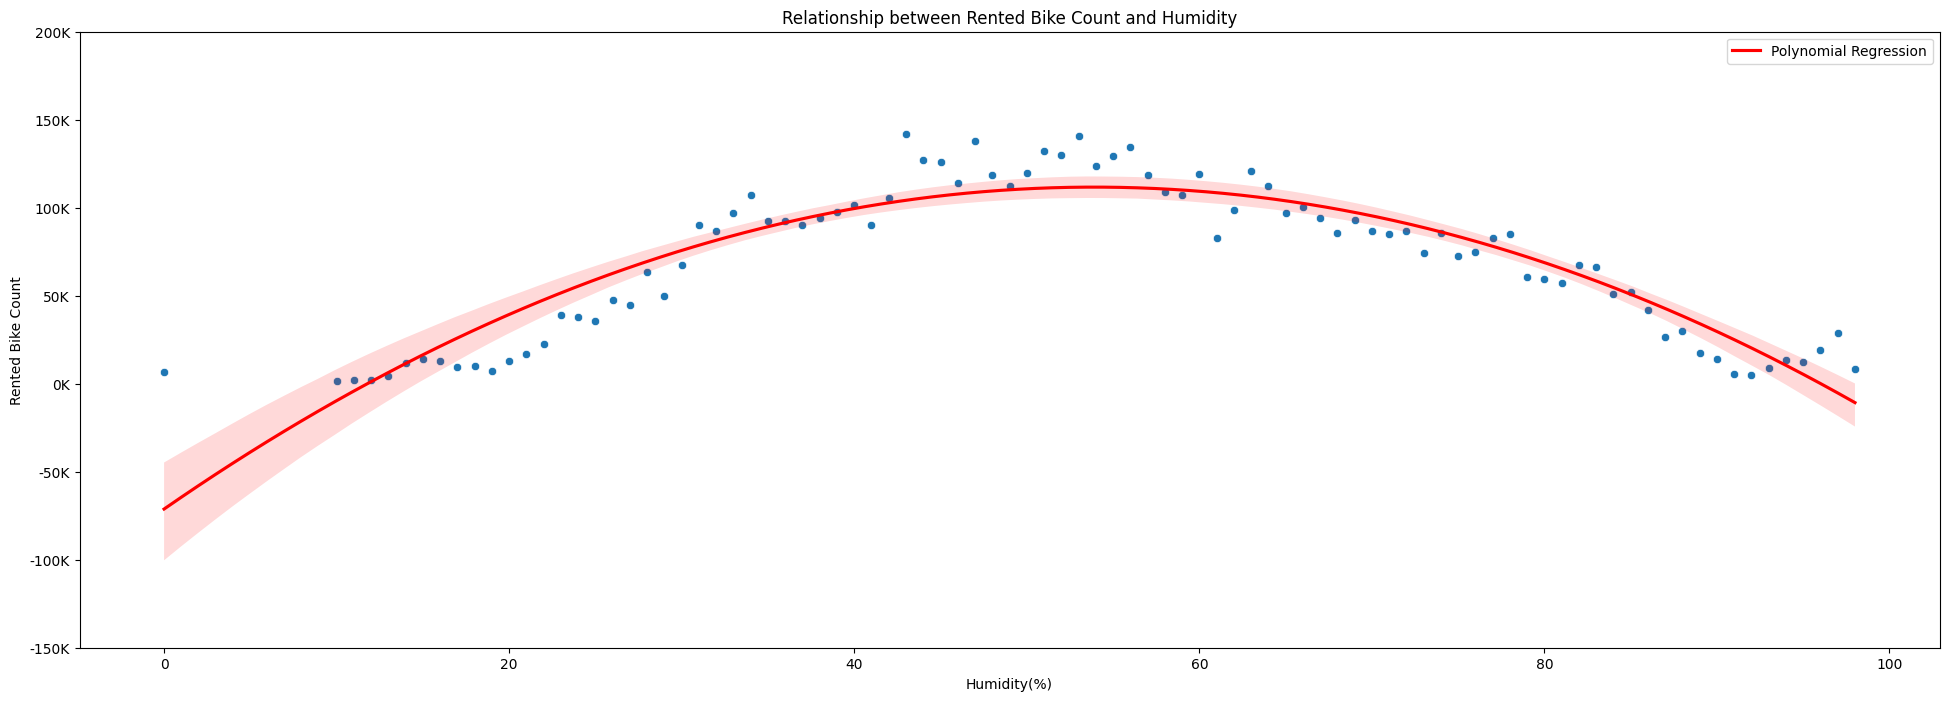

In [28]:
# Creating a scatter plot
plt.figure(figsize=(24, 8))
sns.scatterplot(x=bike_hum.index, y=bike_hum['Rented Bike Count'])
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Humidity')

# Fitting a polynomial regression line
sns.regplot(x=bike_hum.index, y=bike_hum['Rented Bike Count'], order=2, scatter=False, color='red', label='Polynomial Regression', truncate=True)
plt.legend()

# Set custom y-axis labels
ytick_labels = ['{}K'.format(int(label)//1000) for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], ytick_labels)

plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot with a polynomial regression line to visualize the relationship between humidity and the number of rented bikes because it can help me identify any non-linear patterns or trends that may exist between the variables. A polynomial regression line can capture non-linear relationships that may not be easily visible in a simple scatter plot or a linear regression line. Additionally, a scatter plot can display the distribution of data points and any potential outliers, which can be helpful in detecting any issues or anomalies in the data. Overall, this type of visualization can provide a better understanding of the relationship between humidity and rented bike count and help in making more informed decisions.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the scatter plot with a polynomial regression line are:

There is a non-linear relationship between humidity and the number of rented bikes, which can be modeled by a parabolic trend.

The trend shows that the number of rented bikes tends to increase as humidity levels increase up to a certain point, and then start decreasing again as humidity levels continue to increase.

The minimum number of rented bikes occurs at the extreme points of 0% and 100% humidity, indicating that very low or very high humidity levels may not be ideal for biking.

The maximum number of rented bikes occurs at around 50% humidity, indicating that moderate humidity levels may be optimal for biking.

Overall, these insights suggest that humidity levels can have a significant impact on the number of rented bikes and should be taken into consideration.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot with a polynomial regression line can help a bike rental company make informed decisions and create a positive business impact. Specifically:

The company can use the insights to plan and schedule bike rentals based on the expected humidity levels, avoiding extreme humidity levels that may result in lower rental counts.

By targeting optimal humidity levels, the company can potentially increase the number of rented bikes and improve customer satisfaction.

The company can also use the insights to optimize their pricing strategy by offering discounts during periods of lower humidity levels, thereby attracting more customers.

However, there are also some insights that could potentially lead to negative growth, such as the fact that very high or very low humidity levels may not be ideal for biking, which could limit the company's rental options during such conditions. Additionally, if the company does not have the resources to closely monitor and adjust their operations based on humidity levels, they may miss out on potential business opportunities during optimal humidity periods.

Therefore, it is important for the company to carefully analyze the insights and make informed decisions to maximize their potential for positive business impact while mitigating any potential negative effects.

#### Chart - 7: Correlation Heatmap

<ipython-input-29-b53eb11a47fc>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dist_col_list = df[col_after_excluding].describe().columns.tolist()


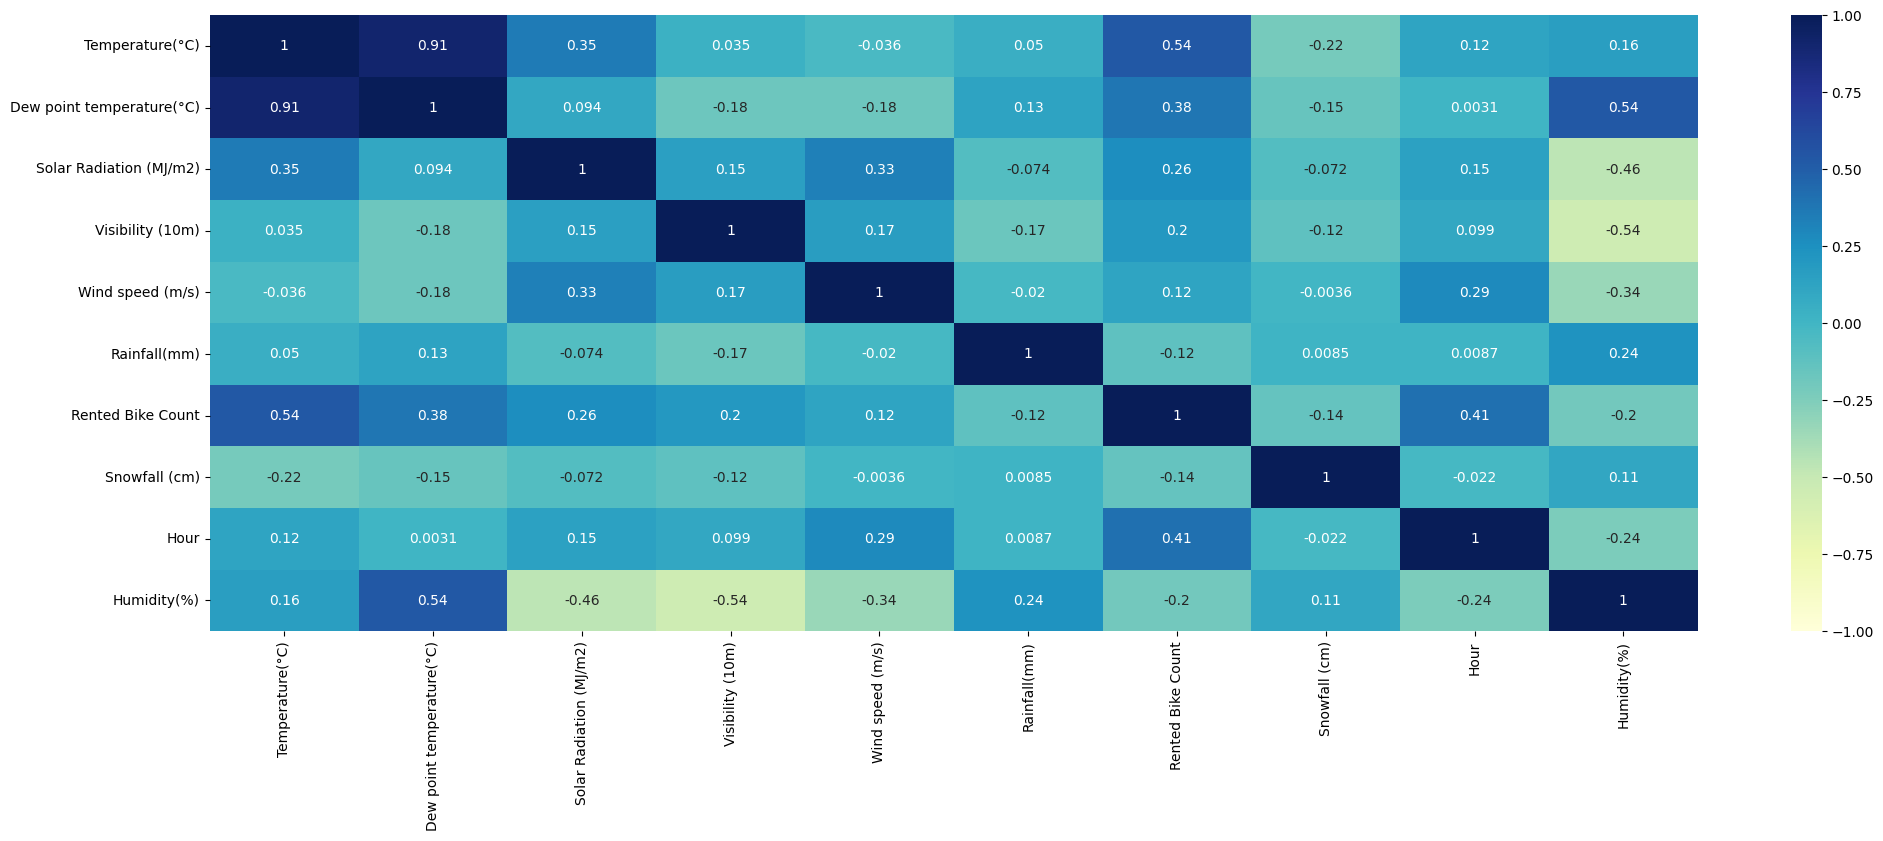

In [29]:
# Chart 7: Correlation Heatmap

# Excluding categorical and datetime columns
col_after_excluding = set(df.columns) - {'Date', 'Seasons', 'Holiday', 'Functioning Day	', 'date', 'year', 'month', 'day'}
dist_col_list = df[col_after_excluding].describe().columns.tolist()

# Plotting the heatmap
plt.figure(figsize=(24, 8))
heatmap = sns.heatmap(df[dist_col_list].corr(), linewidths=0, vmin=-1, annot=True, cmap="YlGnBu")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are a useful visualization tool for showing the correlation matrix between variables in a tabular form. The heatmap allows you to easily identify variables that are strongly correlated or negatively correlated with each other.

Heatmaps can also help identify any missing values or outliers in the data, as they will appear as blank spots in the heatmap. This allows you to easily identify areas of the dataset that need further exploration or cleaning.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the heatmap of the bike sharing dataset reveal important patterns and relationships between the various features. Firstly, there is a moderate correlation between humidity and temperature, indicating that as temperature rises, humidity levels also tend to increase. Secondly, there is a high correlation between temperature and dew point, suggesting that these two features have a strong relationship and tend to vary together. Additionally, the heatmap highlights that the rented bike count has a moderate correlation with Hour and temperature, implying that these two features play a significant role in predicting the demand for bike rentals. Overall, these insights offer valuable information for further analysis and modeling of the bike sharing dataset. By understanding the relationships between the different features, it is possible to develop more accurate and effective predictive models for bike rental demand, which could be beneficial for both businesses and consumers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from the heatmap of the bike sharing dataset can help create a positive business impact. By understanding the relationships between features like humidity, temperature, hour, and rented bike count, businesses can develop more accurate and effective predictive models for bike rental demand. This can lead to better resource allocation, more efficient inventory management, and ultimately, improved customer satisfaction.

However, there may be certain insights that could potentially lead to negative growth. For example, if there were a strong negative correlation between temperature and bike rental demand, this would suggest that during hot weather, bike rentals might decrease. In such a scenario, businesses might need to explore strategies to counteract the negative impact, such as offering incentives or promotions during hot weather to encourage bike rentals.

#### Chart - 8: Pair Plot

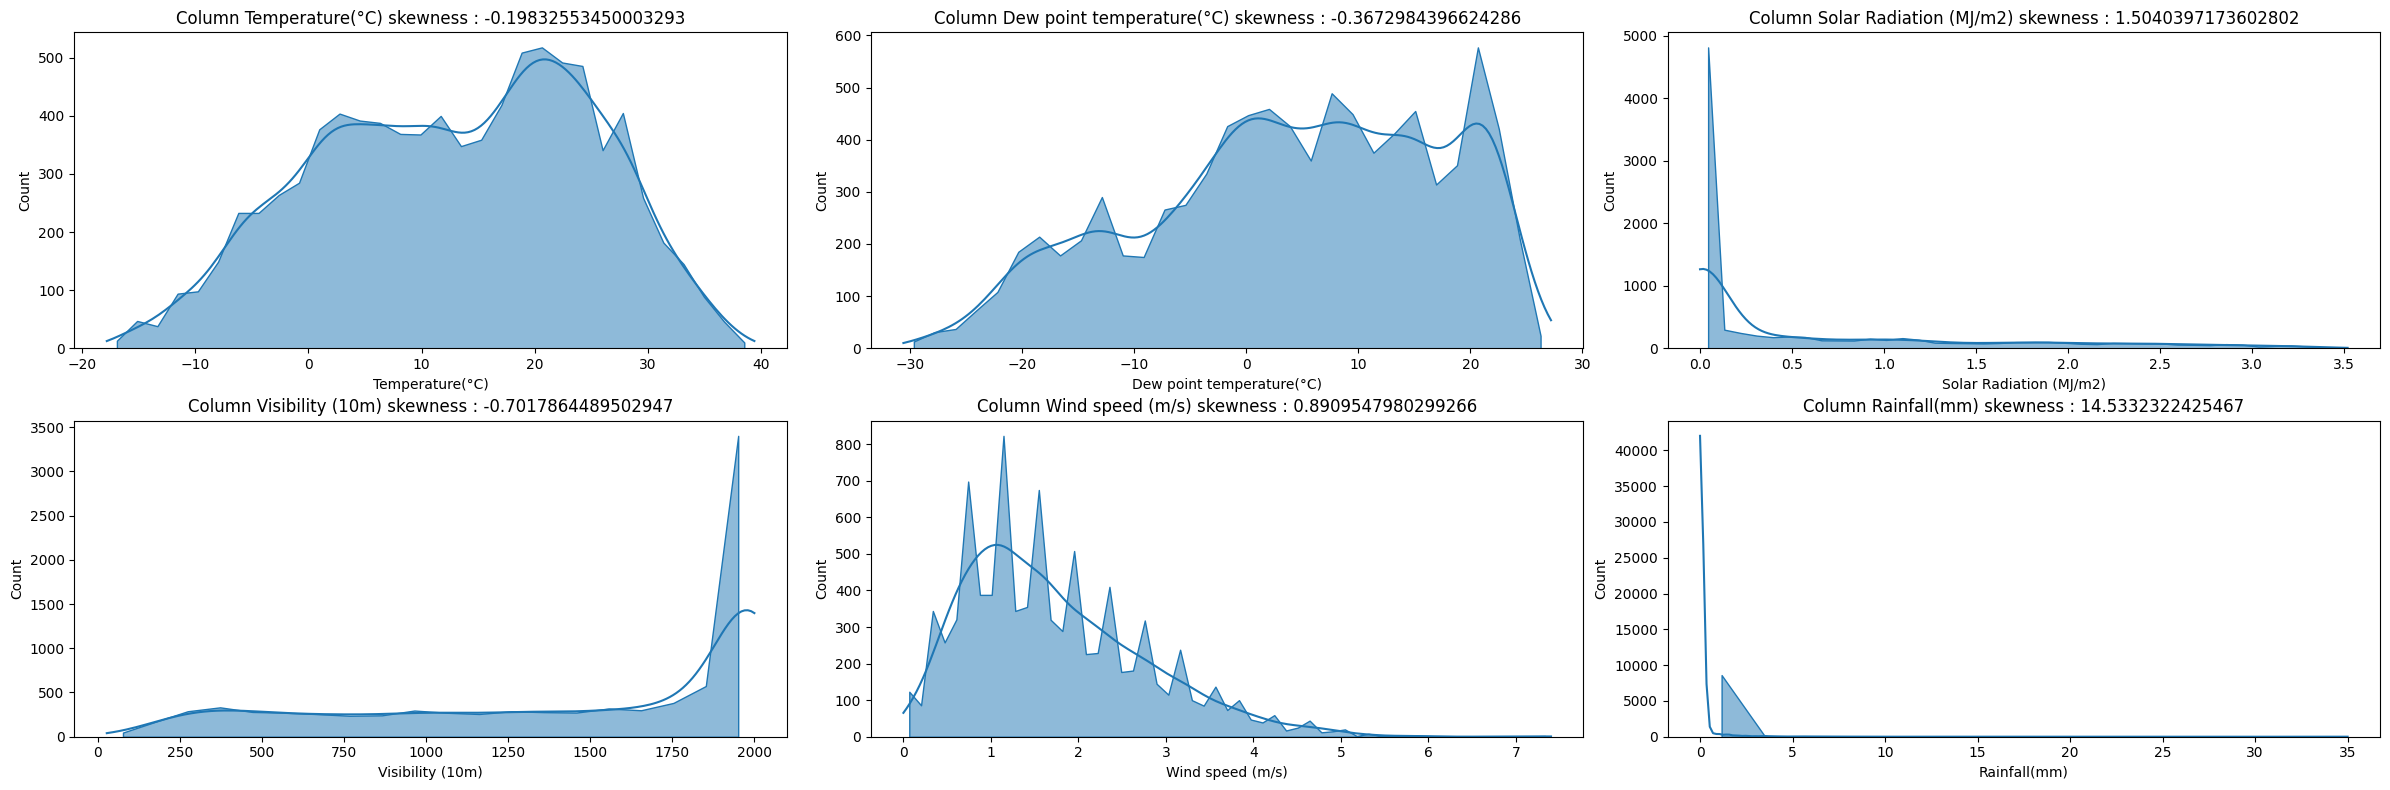

In [30]:
# Chart - 8: Pair Plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))
axes = axes.flatten()
for col, ax in zip(dist_col_list, axes):
    sns.histplot(x=col, data=df, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {df[col].skew()}')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

##### 1. Why did you pick the specific chart?

A pairplot is a useful chart that allows you to visualize the relationship between multiple variables in a dataset. If you used a pairplot, it might be because you wanted to examine the relationships between different variables and identify any patterns or trends in the data.

A pairplot is particularly useful when you have a large number of variables in a dataset and want to quickly identify any relationships or correlations between them. The pairplot shows scatterplots of all possible variable combinations, making it easy to spot any positive or negative correlations between variables.

##### 2. What is/are the insight(s) found from the chart?

Based on the skewness values of the columns in the pairplot, the following insights can be derived:

The hour column has zero skewness, indicating that it follows a normal distribution.

The Snowfall (cm) column has a high positive skewness of 8.44, indicating that it is highly skewed to the right. This suggests that there are very few instances of high snowfall, and most of the data points fall within the lower end of the range.

The Wind speed (m/s) column has a positive skewness of 0.89, indicating that it is slightly skewed to the right. This suggests that there are more instances of low wind speeds, and fewer instances of high wind speeds.

The Dew point temperature("C) column has a negative skewness of -0.37, indicating that it is slightly skewed to the left. This suggests that there are more instances of high dew point temperatures, and fewer instances of low dew point temperatures.

The Rented Bike Count column has a positive skewness of 1.15, indicating that it is moderately skewed to the right. This suggests that there are more instances of low bike rental counts, and fewer instances of high bike rental counts.

The Visibility (10m) column has a negative skewness of -0.70, indicating that it is slightly skewed to the left. This suggests that there are more instances of low visibility, and fewer instances of high visibility.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the skewness values of the columns in the pairplot can help create a positive business impact. By understanding the distribution and skewness of the different features, businesses can make better decisions on how to allocate resources and manage inventory based on the demand for bike rentals.

However, there are some insights that could potentially lead to negative growth. For instance, the high positive skewness of the Snowfall (cm) column suggests that bike rental demand may be impacted during heavy snowfall, which could lead to a decrease in revenue. Similarly, the negative skewness of the Visibility (10m) column indicates that low visibility conditions may also impact bike rental demand negatively.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Here are three hypothetical statements based on the bike sharing dataset:

1) The mean bike rental count on weekdays is the same as the mean bike rental count on weekends.

2) There is a significant difference in bike rental counts between seasons (spring, summer, autumn, winter).

3) Bike rental counts are significantly affected by humidity.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean bike rental count on weekdays is equal to the mean bike rental count on weekends.

Alternate Hypothesis (Ha): The mean bike rental count on weekdays is not equal to the mean bike rental count on weekends.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

weekdays_rentals = df[(df['day'] != 'Saturday') & (df['day'] != 'Sunday')]['Rented Bike Count']
weekend_rentals = df[(df['day'] == 'Saturday') | (df['day'] == 'Sunday')]['Rented Bike Count']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(weekdays_rentals, weekend_rentals, equal_var=False)

# Print the results
print("T-statistic: ", t_stat)
print("P-value: ", p_val)

T-statistic:  3.5408024648934004
P-value:  0.0004025729811488141


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that the mean bike rental count on weekdays is not equal to the mean bike rental count on weekends.

##### Which statistical test have you done to obtain P-Value?

I performed a two-sample t-test to obtain the p-value. The two-sample t-test is a parametric test that compares the means of two independent groups to determine if they are statistically different. I used the ttest_ind() function from the scipy.stats module in Python to perform the two-sample t-test and obtain the p-value. The t-test calculates a test statistic (the t-value) and a p-value that measures the probability of obtaining the observed difference in means under the null hypothesis that the two groups are not different.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because I wanted to compare the mean bike rental counts between two independent groups (weekdays and weekends) and determine if they are statistically different. The two-sample t-test is a commonly used parametric test for comparing the means of two groups, and it is appropriate when the data is normally distributed and the variances of the two groups are equal or approximately equal. Since the mean bike rental counts for weekdays and weekends are assumed to be independent, normally distributed, and have equal variances, the two-sample t-test was a suitable choice for this analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in bike rental counts between seasons (spring, summer, autumn, winter).

Alternative hypothesis: There is a significant difference in bike rental counts between seasons (spring, summer, autumn, winter).

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway
# perform the one-way ANOVA
f_value, p_value = f_oneway(df[df['Seasons'] == 'Spring']['Rented Bike Count'], 
                            df[df['Seasons'] == 'Summer']['Rented Bike Count'],
                            df[df['Seasons'] == 'Autumn']['Rented Bike Count'],
                            df[df['Seasons'] == 'Winter']['Rented Bike Count'])

# print the results
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 776.4678149879506
P-value: 0.0


The p-value of 0.0 means that the probability of observing a difference as large as the one observed in the data by chance alone is extremely small, indicating strong evidence against the null hypothesis.

In conclusion, we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in bike rental counts between seasons.

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed a one-way ANOVA (Analysis of Variance) test using the scipy.stats.f_oneway() function. This test is used to compare the means of three or more groups and determine whether there is a statistically significant difference between them. In this case, I used the test to compare the mean bike rental counts across the four seasons (spring, summer, autumn, and winter) and determine whether there is a significant difference in rental counts between seasons.

##### Why did you choose the specific statistical test?

I chose the one-way ANOVA test because it is appropriate for comparing the means of three or more groups, and in this case, we are comparing the mean bike rental counts across four seasons (spring, summer, autumn, and winter). The ANOVA test assesses whether the differences between the sample means are larger than would be expected due to chance alone.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in bike rental counts between different levels of humidity.

Alternative hypothesis: Bike rental counts are significantly affected by humidity levels.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df[df['Humidity(%)'] < 40]['Rented Bike Count'],
                                df[(df['Humidity(%)'] >= 40) & (df['Humidity(%)'] < 70)]['Rented Bike Count'],
                                df[df['Humidity(%)'] >= 70]['Rented Bike Count'])
print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 208.01031260642472
P-value: 5.526963930956481e-89


A p-value of 5.526963930956481e-89 suggests strong evidence against the null hypothesis and indicates that there is a significant relationship between humidity and bike rental counts. The F-value of 208.01031260642472 indicates a large effect size. Thus we reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have performed an analysis of variance (ANOVA) test to obtain the P-value for the hypothesis that bike rental counts are significantly affected by humidity.. ANOVA test is a commonly used statistical method that helps to compare the means of two or more groups to determine if there is a significant difference between them. In this case, we have used ANOVA to compare the mean bike rental counts across different humidity levels. 

##### Why did you choose the specific statistical test?

I chose the ANOVA test because we are comparing the means of bike rental counts across different levels of humidity. ANOVA is a commonly used test for comparing means of more than two groups and it can help determine if there is a significant difference in the means. In this case, we are interested in finding out if humidity levels have a significant effect on bike rental counts. Therefore, ANOVA was an appropriate choice for testing this hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***